In [155]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# import requests
# import json

In [156]:
df = pd.read_csv("mental_health_poll_updated.csv")

In [157]:
df

,Question,Event Category,Region,City
0,How often are you stressed,All the time,California,(not set)
1,How often are you stressed,All the time,Michigan,Interlochen
2,How often are you stressed,All the time,Kentucky,Middlesboro
3,How often are you stressed,All the time,Connecticut,Essex
4,How often are you stressed,All the time,Indiana,Ligonier
...,...,...,...,...
136155,What are you most likely to do when you're str...,Work-out,Florida,Tampa
136156,What are you most likely to do when you're str...,Work-out,Missouri,Gallatin
136157,What are you most likely to do when you're str...,Work-out,Arizona,Tucson
136158,What are you most likely to do when you're str...,Work-out,Florida,Fort Lauderdale


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136160 entries, 0 to 136159
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Question        135344 non-null  object
 1   Event Category  136160 non-null  object
 2   Region          136160 non-null  object
 3   City            136160 non-null  object
dtypes: object(4)
memory usage: 4.2+ MB


In [159]:
#some of our question rows are empty

**stats on our dataframe**

In [160]:
df.describe()

,Question,Event Category,Region,City
count,135344,136160,136160,136160
unique,4,21,52,4352
top,How often are you stressed,All the time,Texas,Dallas
freq,35878,16101,11848,4706


In [161]:
df['Question'].unique(), df['Event Category'].unique()

(array(['How often are you stressed', 'What resources do you use to help',
        'What stresses you out the most',
        "What are you most likely to do when you're stressed", nan],
       dtype=object),
 array(['All the time', 'Apps/Online', 'College', 'Drugs/Drinking', 'Eat',
        'Friends', 'Never', 'Nothing Q3', 'Nothing Q4', 'Other',
        'Other Q3', 'Other Q4', 'Parents', 'Rarely', 'Relationships',
        'School resources', 'Sometimes', 'Talk to Friends', 'Teachers',
        'Therapist', 'Work-out'], dtype=object))

In [162]:
#df.groupby(['Question', 'Event Category']).groups

**Grouping by questions and answers + count**

In [163]:
df.groupby('Question')['Event Category'].value_counts()   # keep in mind, we do not see the empty question rows here, which actually have answer "school resources"

Question                                             Event Category 
How often are you stressed                           All the time       16101
                                                     Sometimes          13146
                                                     Rarely              4370
                                                     Never               2261
What are you most likely to do when you're stressed  Talk to Friends     7469
                                                     Eat                 6545
                                                     Nothing Q3          5618
                                                     Other Q3            5273
                                                     Work-out            4806
                                                     Drugs/Drinking      3595
What resources do you use to help                    Apps/Online        14135
                                                     Nothing Q4         1

In [164]:
df.groupby('Event Category')['Question'].sum()   #it seems ike the empty Qs are all with the answer "School resources"

Event Category
All the time        How often are you stressedHow often are you st...
Apps/Online         What resources do you use to helpWhat resource...
College             What stresses you out the mostWhat stresses yo...
Drugs/Drinking      What are you most likely to do when you're str...
Eat                 What are you most likely to do when you're str...
Friends             What stresses you out the mostWhat stresses yo...
Never               How often are you stressedHow often are you st...
Nothing Q3          What are you most likely to do when you're str...
Nothing Q4          What resources do you use to helpWhat resource...
Other               What stresses you out the mostWhat stresses yo...
Other Q3            What are you most likely to do when you're str...
Other Q4            What resources do you use to helpWhat resource...
Parents             What stresses you out the mostWhat stresses yo...
Rarely              How often are you stressedHow often are you st...
Relat

In [165]:
df["Question"].isna().sum()    #816 empty Question rows, we have to find out which one it is and fill it up

816

In [166]:
df['Question'].value_counts()  #how many rows we have for each question

How often are you stressed                             35878
What stresses you out the most                         34881
What are you most likely to do when you're stressed    33306
What resources do you use to help                      31279
Name: Question, dtype: int64

In [167]:
df[df['Question'].isna()]

,Question,Event Category,Region,City
99698,NaN,School resources,Kentucky,Oak Grove
99699,NaN,School resources,Illinois,Chicago
99700,NaN,School resources,Arizona,Eloy
99701,NaN,School resources,Alabama,Birmingham
99702,NaN,School resources,Minnesota,Belle Plaine
...,...,...,...,...
100509,NaN,School resources,Florida,Pompano Beach
100510,NaN,School resources,Texas,Fort Worth
100511,NaN,School resources,Colorado,Montrose
100512,NaN,School resources,Massachusetts,Barnstable


In [168]:
#All of the empty question's have the same answer

df[df["Question"].isnull()]["Event Category"].value_counts()

School resources    816
Name: Event Category, dtype: int64

In [169]:
df["Question"] = df["Question"].fillna("What resources do you use to help")

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136160 entries, 0 to 136159
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Question        136160 non-null  object
 1   Event Category  136160 non-null  object
 2   Region          136160 non-null  object
 3   City            136160 non-null  object
dtypes: object(4)
memory usage: 4.2+ MB


In [171]:
df.groupby('Question')['Event Category'].value_counts()

Question                                             Event Category  
How often are you stressed                           All the time        16101
                                                     Sometimes           13146
                                                     Rarely               4370
                                                     Never                2261
What are you most likely to do when you're stressed  Talk to Friends      7469
                                                     Eat                  6545
                                                     Nothing Q3           5618
                                                     Other Q3             5273
                                                     Work-out             4806
                                                     Drugs/Drinking       3595
What resources do you use to help                    Apps/Online         14135
                                                     Nothing 

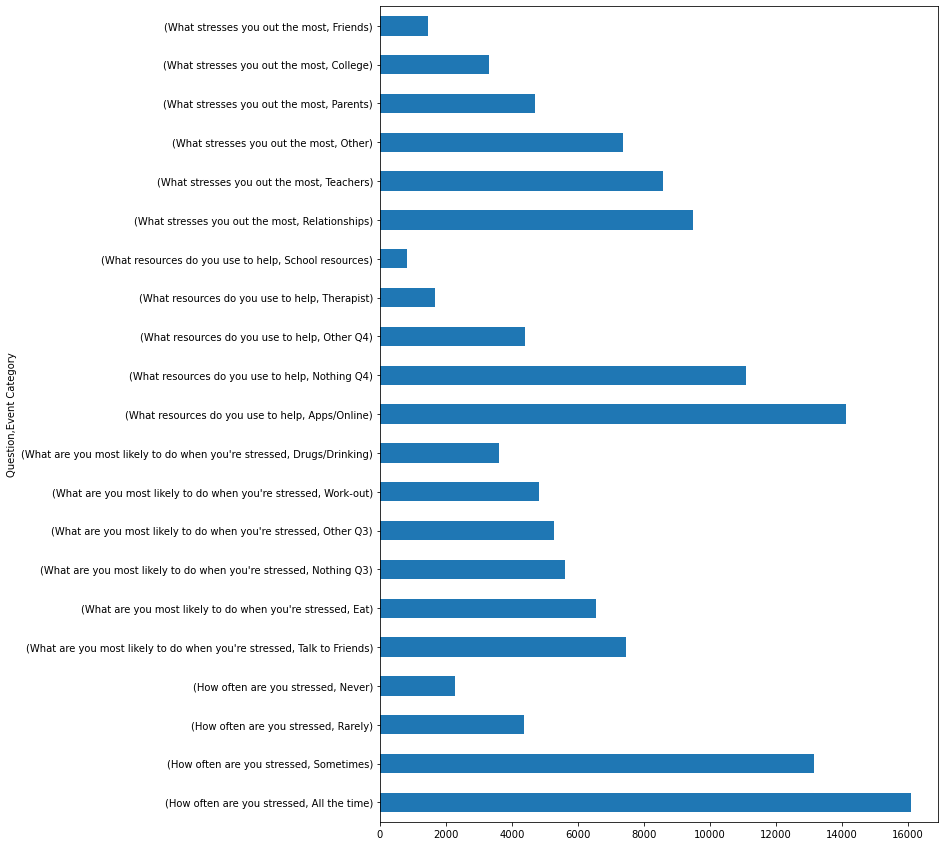

In [172]:
df.groupby('Question')['Event Category'].value_counts().plot.barh(figsize=(10,15))

In [173]:
dct = {'How often are you stressed':0, "What are you most likely to do when you're stressed":1, 'What resources do you use to help':2,'What stresses you out the most':3}

df["Question_num"] = df["Question"].apply(lambda x: dct[x])

In [176]:
df["Question_num"].unique()

array([0, 2, 3, 1], dtype=int64)

In [179]:
df

,Question,Event Category,Region,City,Question_num
0,How often are you stressed,All the time,California,(not set),0
1,How often are you stressed,All the time,Michigan,Interlochen,0
2,How often are you stressed,All the time,Kentucky,Middlesboro,0
3,How often are you stressed,All the time,Connecticut,Essex,0
4,How often are you stressed,All the time,Indiana,Ligonier,0
...,...,...,...,...,...
136155,What are you most likely to do when you're str...,Work-out,Florida,Tampa,1
136156,What are you most likely to do when you're str...,Work-out,Missouri,Gallatin,1
136157,What are you most likely to do when you're str...,Work-out,Arizona,Tucson,1
136158,What are you most likely to do when you're str...,Work-out,Florida,Fort Lauderdale,1
